<a href="https://colab.research.google.com/github/Moulanagar/Differential-Gene-Analysis/blob/main/DGA_bioinfo_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing biocmanager
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.22), R 4.4.0 (2024-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2'”
Old packages: 'bit', 'brio', 'bslib', 'callr', 'curl', 'data.table', 'DBI',
  'dbplyr', 'devtools', 'digest', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable',
  'highr', 'htmltools', 'httr2', 'isoband', 'knitr', 'munsell', 'openssl',
  'pkgbuild', 'processx', 'ragg', 'remotes', 'rmarkdown', 'rstudioapi',
  'rvest', 'sass', 'systemfonts', 'testthat', 'textshaping', 'tidyselect',
  'tinytex', 'usethis', 'whisker', 'xfun', 'xopen', 'zip', 'codetools',
  'lattice', 'MASS', 'Matrix', 'nlme', 'survival'



In [ ]:
install.packages("pheatmap")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(DESeq2)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)

In [ ]:
#installing readxl package for reading excel files
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)

In [ ]:
countdata <- read_excel("pprojectxlsx.xlsx")
infodata <- read_excel("/content/Untitled spreadsheet.xlsx")

In [ ]:
head(countdata)

gene_id,C1,C2,C3,D1,D2,D3,VD1,VD2,VD3,⋯,V3,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
ENSSSCG00000014540,55071.59359,56414.13125,55006.71924,44640.823,42601.791,45818.815,47342.329,46152.276,42561.879,⋯,61167.068,-,2,9535148,9537977,+,866,protein_coding,ferritin heavy chain 1 [Source:NCBI gene (formerly Entrezgene);Acc:397030],-
ENSSSCG00000018075,5858.10017,9285.18389,8492.40947,4941.672,6939.652,5570.491,5836.239,8414.656,5354.517,⋯,7198.895,COX1,MT,6511,8055,+,1545,protein_coding,mitochondrially encoded cytochrome c oxidase I [Source:VGNC Symbol;Acc:VGNC:99790],-
ENSSSCG00000050793,7552.07425,7539.98335,3322.16098,6007.429,5981.383,4609.846,7116.337,4489.722,6037.392,⋯,8567.000,ssc-mir-10390,9,4700784,4700878,-,95,miRNA,ssc-mir-10390 [Source:miRBase;Acc:MI0033404],-
ENSSSCG00000003153,6261.87499,5898.17738,4588.76562,6289.212,5779.375,6660.253,5947.481,5091.543,5501.671,⋯,6003.688,FTL,6,54227164,54232752,+,1494,protein_coding,ferritin light chain [Source:NCBI gene (formerly Entrezgene);Acc:397035],-
ENSSSCG00000008953,57.59978,75.79129,80.57904,4032.217,5779.257,5980.171,13278.553,20190.976,14298.573,⋯,1503.675,CXCL8,8,69932643,69935861,+,1917,protein_coding,C-X-C motif chemokine ligand 8 [Source:VGNC Symbol;Acc:VGNC:87106],-
ENSSSCG00000018082,5264.11540,6841.47818,4495.17874,4831.336,5866.333,5151.114,5675.279,5783.935,5362.637,⋯,6396.753,COX3,MT,9800,10583,+,784,protein_coding,mitochondrially encoded cytochrome c oxidase III [Source:VGNC Symbol;Acc:VGNC:99792],-


In [ ]:
class(countdata)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
head(infodata)

Sample,Condition
<chr>,<chr>
C1,C
C2,C
C3,C
D1,D
D2,D
D3,D


In [ ]:
colnames(countdata)

[1] "gene_id"          "C1"               "C2"               "C3"              
 [5] "D1"               "D2"               "D3"               "VD1"             
 [9] "VD2"              "VD3"              "V1"               "V2"              
[13] "V3"               "gene_name"        "gene_chr"         "gene_start"      
[17] "gene_end"         "gene_strand"      "gene_length"      "gene_biotype"    
[21] "gene_description" "tf_family"

In [ ]:
datamatrix <- countdata[,2:13]
datamatrix <- as.data.frame(lapply(datamatrix, as.integer))
rownames(datamatrix) <- countdata$gene_id
datamatrix <- as.matrix(datamatrix)
head(datamatrix)

,C1,C2,C3,D1,D2,D3,VD1,VD2,VD3,V1,V2,V3
ENSSSCG00000014540,55071,56414,55006,44640,42601,45818,47342,46152,42561,59721,64698,61167
ENSSSCG00000018075,5858,9285,8492,4941,6939,5570,5836,8414,5354,6852,8812,7198
ENSSSCG00000050793,7552,7539,3322,6007,5981,4609,7116,4489,6037,8204,6543,8566
ENSSSCG00000003153,6261,5898,4588,6289,5779,6660,5947,5091,5501,6131,5394,6003
ENSSSCG00000008953,57,75,80,4032,5779,5980,13278,20190,14298,1348,1828,1503
ENSSSCG00000018082,5264,6841,4495,4831,5866,5151,5675,5783,5362,6055,6653,6396


In [ ]:
infomatrix <- infodata[,2]
infomatrix <- as.matrix(infomatrix)
rownames(infomatrix) <- infodata$Sample
head(infomatrix)

,Condition
C1,C
C2,C
C3,C
D1,D
D2,D
D3,D


In [ ]:
print(class(infomatrix))
print(class(datamatrix))

[1] "matrix" "array" 
[1] "matrix" "array" 


In [ ]:
print(which(is.na(datamatrix)))

integer(0)


In [ ]:
head(datamatrix)

,C1,C2,C3,D1,D2,D3,VD1,VD2,VD3,V1,V2,V3
ENSSSCG00000014540,55071,56414,55006,44640,42601,45818,47342,46152,42561,59721,64698,61167
ENSSSCG00000018075,5858,9285,8492,4941,6939,5570,5836,8414,5354,6852,8812,7198
ENSSSCG00000050793,7552,7539,3322,6007,5981,4609,7116,4489,6037,8204,6543,8566
ENSSSCG00000003153,6261,5898,4588,6289,5779,6660,5947,5091,5501,6131,5394,6003
ENSSSCG00000008953,57,75,80,4032,5779,5980,13278,20190,14298,1348,1828,1503
ENSSSCG00000018082,5264,6841,4495,4831,5866,5151,5675,5783,5362,6055,6653,6396


In [ ]:
dds <- DESeqDataSetFromMatrix(countData = datamatrix, colData = infomatrix, design=~Condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
dds

class: DESeqDataSet 
dim: 32418 12 
metadata(1): version
assays(1): counts
rownames(32418): ENSSSCG00000014540 ENSSSCG00000018075 ... novel.487
  novel.488
rowData names(0):
colnames(12): C1 C2 ... V2 V3
colData names(1): Condition

In [ ]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
normalizecount <- counts(dds, normalized = TRUE)
head(normalizecount)

,C1,C2,C3,D1,D2,D3,VD1,VD2,VD3,V1,V2,V3
ENSSSCG00000014540,56601.54947,57782.87591,56012.22322,44386.887,42454.851,44927.340,46279.166,44910.551,41794.282,59821.019,64698,61114.866
ENSSSCG00000018075,6020.80726,9510.29891,8647.34392,4912.984,6915.195,5461.724,5704.981,8187.671,5257.550,6863.476,8812,7191.865
ENSSSCG00000050793,7761.88741,7721.93253,3382.76925,5972.940,5960.481,4519.405,6956.245,4368.250,5928.246,8217.740,6543,8558.699
ENSSSCG00000003153,6435.00756,6041.11395,4671.92816,6253.341,5759.174,6530.536,5813.489,4954.057,5401.902,6141.268,5394,5997.884
ENSSSCG00000008953,58.58416,76.81986,81.46344,4009.138,5759.174,5863.754,12979.907,19646.906,14040.428,1350.258,1828,1501.719
ENSSSCG00000018082,5410.29864,7006.99568,4577.22691,4803.608,5845.876,5050.869,5547.596,5627.442,5265.406,6065.141,6653,6390.549


In [ ]:
res <- results(dds, alpha = 0.05)
head(as.data.frame(res))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSSSCG00000014540,51731.968,-0.35764314,0.07056976,-5.0679373,4.021498e-07,1.249713e-05
ENSSSCG00000018075,6957.158,-0.33635948,0.20807965,-1.6164939,1.059876e-01,4.467213e-01
ENSSSCG00000050793,6324.300,-0.12900417,0.26437989,-0.4879500,6.255852e-01,9.514763e-01
ENSSSCG00000003153,5782.808,-0.08476608,0.12966970,-0.6537077,5.133001e-01,9.042904e-01
ENSSSCG00000008953,5599.679,7.74922811,0.22021249,35.1897757,2.866377e-271,2.467378e-267
ENSSSCG00000018082,5687.001,-0.04781316,0.14554273,-0.3285163,7.425213e-01,9.821543e-01


In [ ]:
summary(res)


out of 11130 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 530, 4.8%
LFC < 0 (down)     : 377, 3.4%
outliers [1]       : 0, 0%
low counts [2]     : 2522, 23%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
resordered <- res[order(res$padj),]
head(as.data.frame(resordered))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSSSCG00000008953,5599.6794,7.749228,0.2202125,35.18978,2.866377e-271,2.467378e-267
ENSSSCG00000008957,1076.9339,6.346169,0.1855613,34.19985,2.430098e-256,1.045914e-252
ENSSSCG00000008959,650.8761,6.203181,0.2139539,28.99307,8.045434e-185,2.308503e-181
ENSSSCG00000027607,561.5617,5.611999,0.1957596,28.66781,9.617648e-181,2.069718e-177
ENSSSCG00000030388,829.1735,2.604217,0.1247443,20.87643,8.770615e-97,1.509949e-93
ENSSSCG00000010948,895.1397,-2.522950,0.1275104,-19.78623,3.912063e-87,5.612507e-84


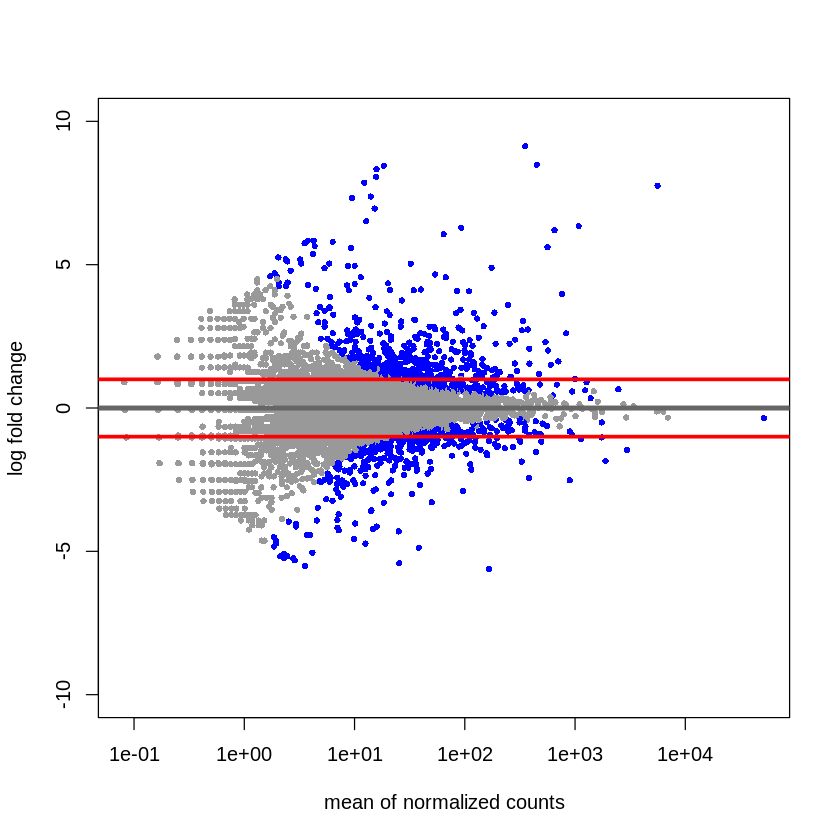

In [ ]:
plotMA(res, cex = 0.7, ylim = c(-10,10))
abline(h = c(-1,1), col = 'red' , lwd = 3)

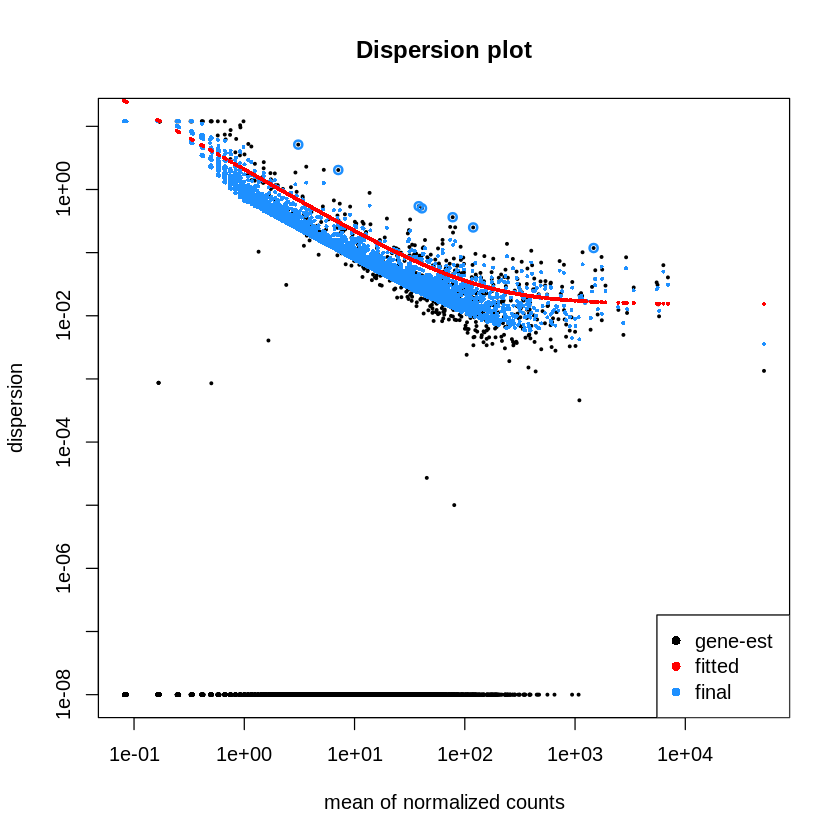

In [ ]:
plotDispEsts(dds, main = "Dispersion plot")

In [ ]:
rld <- rlogTransformation(dds, blind = FALSE)
head(assay(rld))

,C1,C2,C3,D1,D2,D3,VD1,VD2,VD3,V1,V2,V3
ENSSSCG00000014540,15.769198,15.795092,15.756082,15.46520,15.40970,15.48030,15.51731,15.47983,15.39015,15.83857,15.93697,15.86542
ENSSSCG00000018075,12.579930,13.151121,13.031851,12.32761,12.75243,12.45884,12.51295,12.96347,12.41158,12.74306,13.05549,12.80138
ENSSSCG00000050793,12.876070,12.869609,11.845319,12.54883,12.54623,12.20249,12.73899,12.16039,12.53947,12.94759,12.66250,12.99858
ENSSSCG00000003153,12.629937,12.551108,12.231470,12.59419,12.49153,12.64835,12.50323,12.30421,12.41179,12.57162,12.40997,12.54215
ENSSSCG00000008953,7.164625,7.369581,7.415765,11.82972,12.28842,12.31132,13.32665,13.86039,13.42757,10.47229,10.84633,10.60315
ENSSSCG00000018082,12.409851,12.732614,12.202135,12.26201,12.50631,12.32434,12.44105,12.45885,12.37607,12.55224,12.66778,12.61748


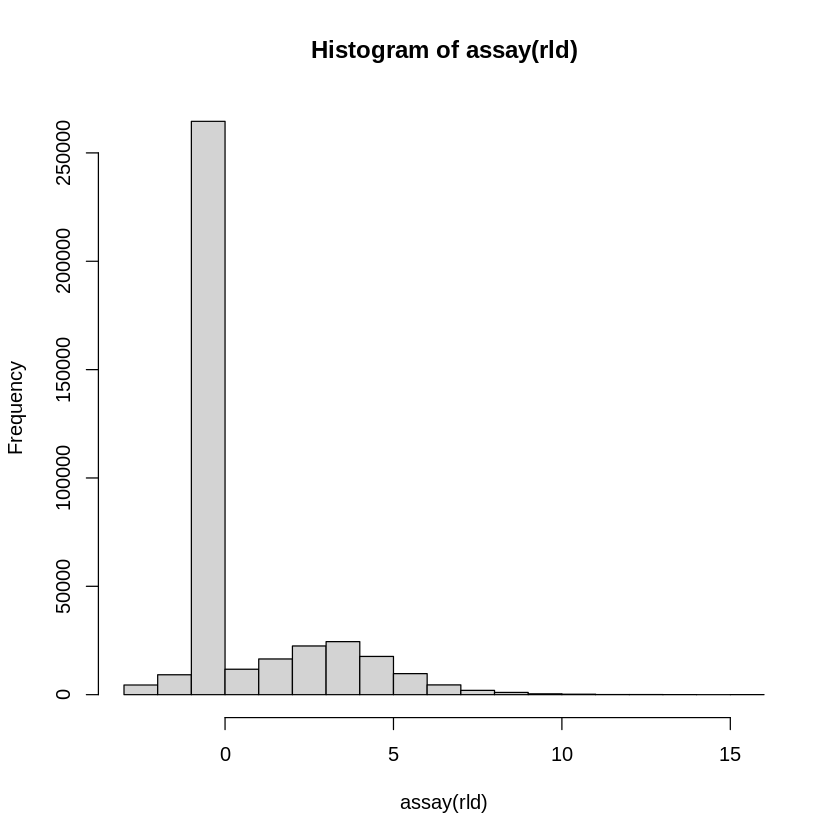

In [ ]:
hist(assay(rld))

using ntop=500 top features by variance



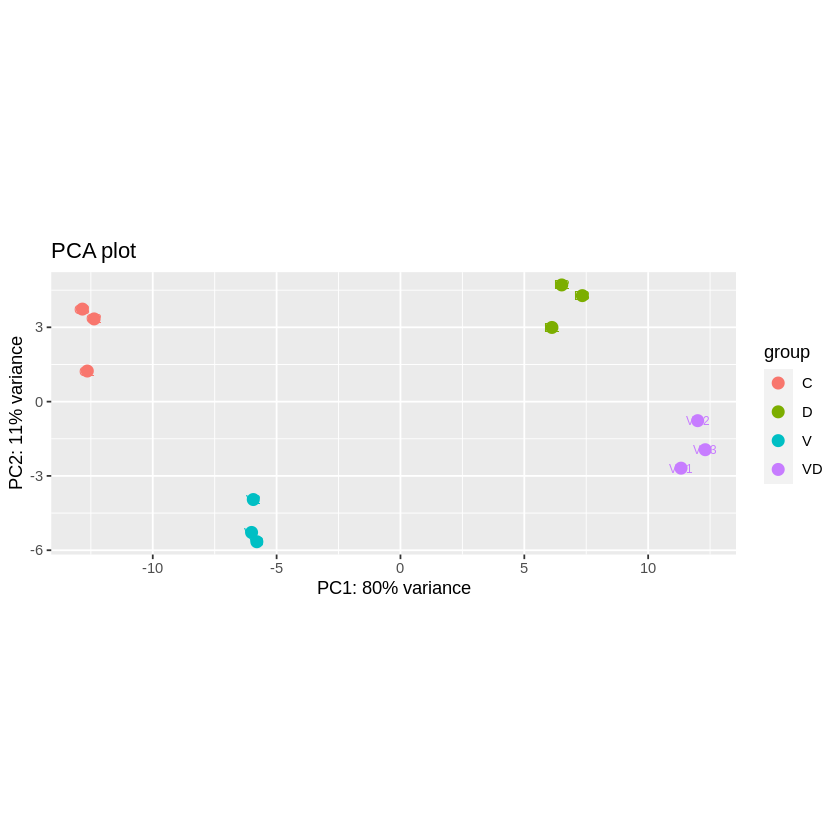

In [ ]:
# PCA plot
PCAA <- plotPCA(rld, intgroup="Condition")
PCAA + geom_text(aes(label=name), size = 2.5)+ggtitle("PCA plot")

Warning message:
“Removed 21288 rows containing missing values (`geom_point()`).”


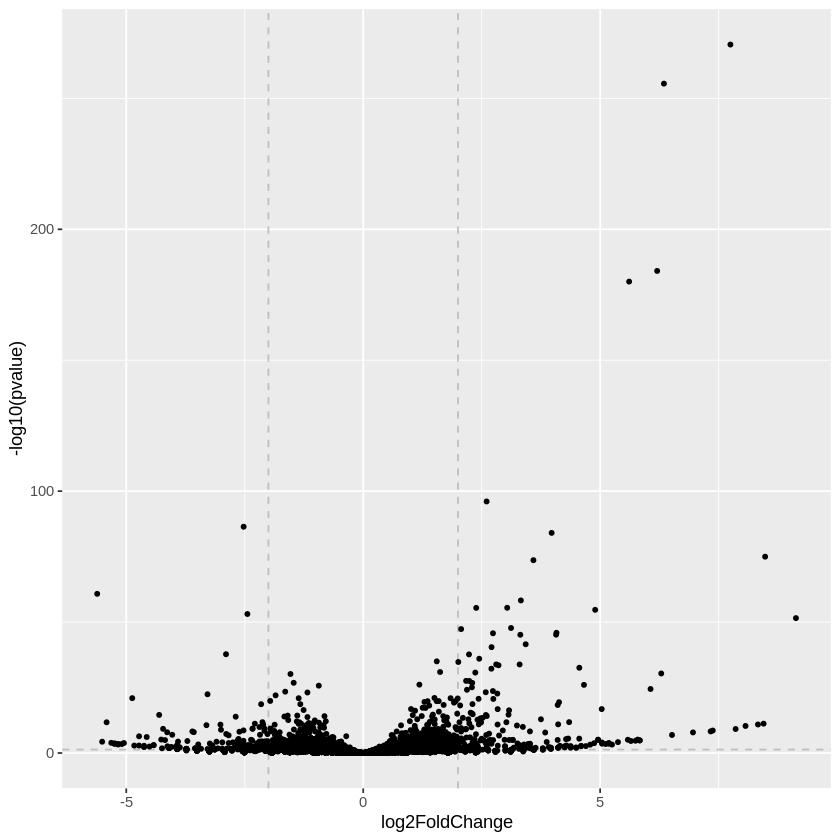

In [ ]:
#volcano plot
ggplot(data = as.data.frame(res), aes(x = log2FoldChange, y = -log10(pvalue))) +
   geom_vline(xintercept = c(-2, 2), col = "gray", linetype = 'dashed') +
   geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
   geom_point(size = 1)

In [ ]:
resdf <- as.data.frame(res)
resdf$diffexpressed <- "NO"
resdf$diffexpressed[resdf$log2FoldChange > 0.6 & resdf$pvalue < 0.05] <- "UP"
resdf$diffexpressed[resdf$log2FoldChange < -0.6 & resdf$pvalue < 0.05] <- "DOWN"
head(resdf)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,diffexpressed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSSSCG00000014540,51731.968,-0.35764314,0.07056976,-5.0679373,4.021498e-07,1.249713e-05,NO
ENSSSCG00000018075,6957.158,-0.33635948,0.20807965,-1.6164939,1.059876e-01,4.467213e-01,NO
ENSSSCG00000050793,6324.300,-0.12900417,0.26437989,-0.4879500,6.255852e-01,9.514763e-01,NO
ENSSSCG00000003153,5782.808,-0.08476608,0.12966970,-0.6537077,5.133001e-01,9.042904e-01,NO
ENSSSCG00000008953,5599.679,7.74922811,0.22021249,35.1897757,2.866377e-271,2.467378e-267,UP
ENSSSCG00000018082,5687.001,-0.04781316,0.14554273,-0.3285163,7.425213e-01,9.821543e-01,NO


Warning message:
“Removed 21288 rows containing missing values (`geom_point()`).”


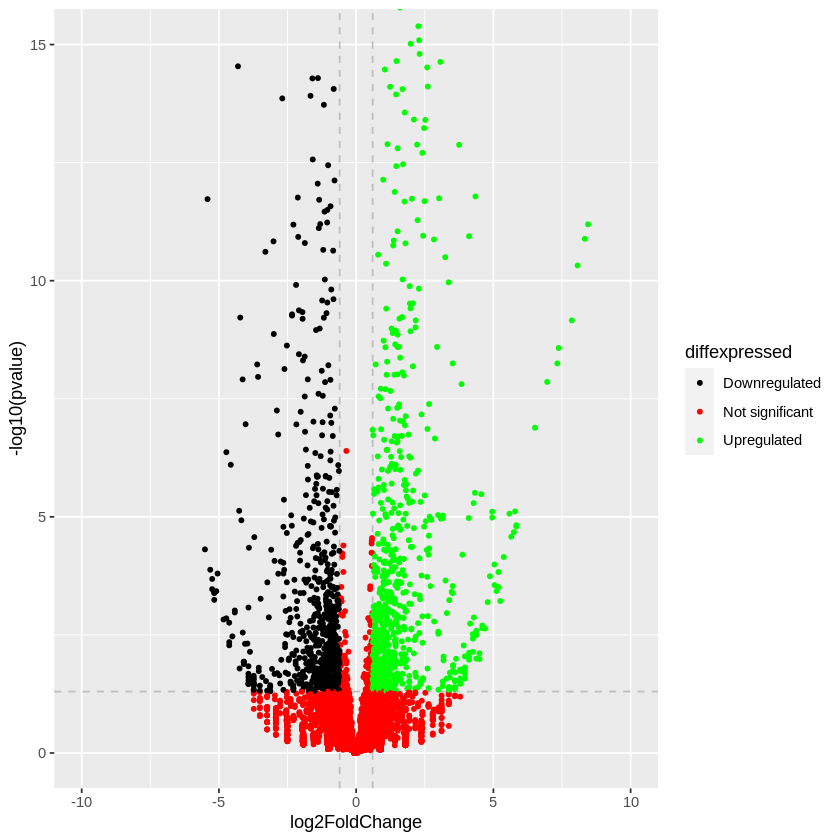

In [ ]:
#volcano plot
ggplot(data = resdf, aes(x = log2FoldChange, y = -log10(pvalue), col = diffexpressed)) +
   geom_vline(xintercept = c(-0.6, 0.6), col = "gray", linetype = 'dashed') +
   geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
   coord_cartesian(ylim = c(0, 15), xlim = c(-10, 10)) +
   geom_point(size = 1) +
   scale_color_manual(values = c("black", "red", "green"), labels = c("Downregulated", "Not significant", "Upregulated"))

HEAT MAP


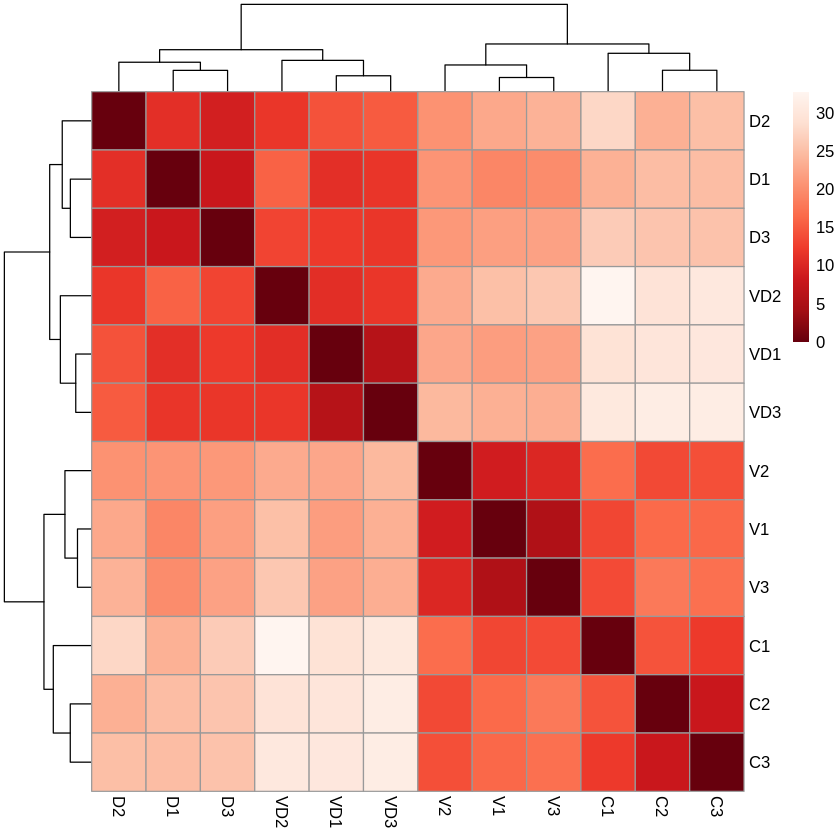

In [ ]:
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
#colnames(sampleDistMatrix)
colors <- colorRampPalette(rev(brewer.pal(9, "Reds")))(255)
pheatmap(sampleDistMatrix,
        clustering_distance_rows=sampleDists,
        clustering_distance_cols=sampleDists,
        col=colors,
        width = 20,
        height = 20)

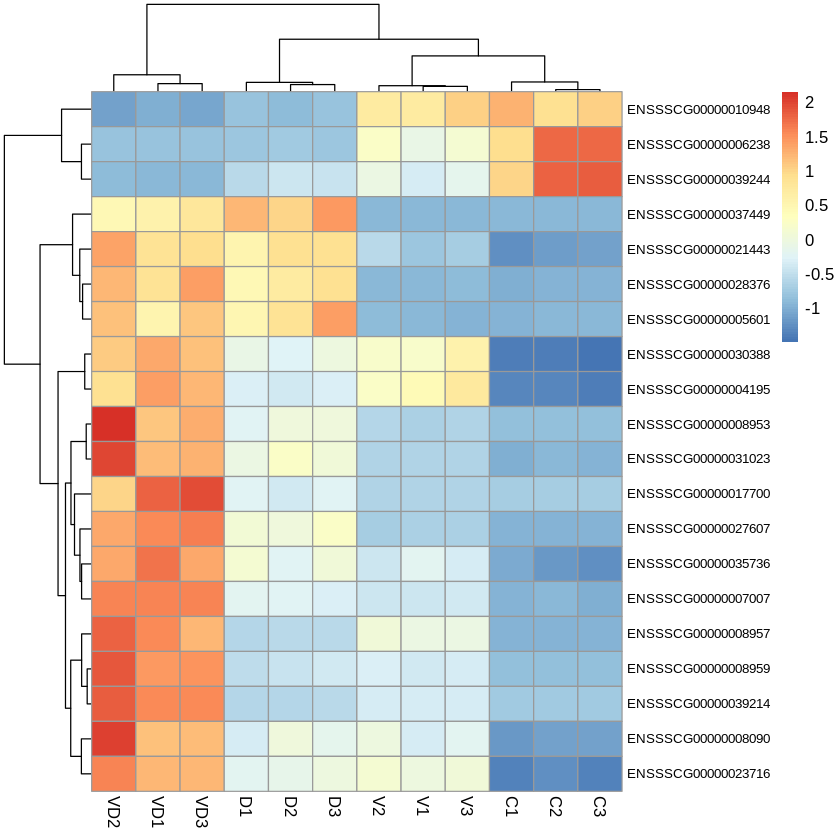

In [ ]:
# Get the row names of the heatmap
row_names <- rownames(z_score_subset)

# Create the heatmap
pheatmap(z_score_subset, cluster_rows = TRUE, show_rownames = TRUE,
         cluster_cols = TRUE, fontsize_row = 8)